In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('gurgaon_properties_missing_value_imputation.csv')

In [4]:
df.shape

(3554, 18)

In [5]:
df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,ambience creacions,sector 22,3.20,11498.0,3.0,4.0,3+,2.0,New Property,2517.0,0.0,0.0,0.0,0.0,0.0,1.0,42.0
1,flat,m3m woodshire,sector 107,1.80,7624.0,3.0,4.0,3+,2.0,Relatively New,1837.0,0.0,1.0,0.0,0.0,0.0,1.0,129.0
2,flat,palam vihar society,sector 2,0.40,8602.0,1.0,1.0,1,5.0,Moderately Old,450.0,0.0,0.0,0.0,0.0,0.0,0.0,39.0
3,flat,smart world gems,sector 89,1.20,12526.0,3.0,3.0,3,3.0,New Property,1064.0,0.0,0.0,1.0,1.0,0.0,1.0,131.0
4,flat,imt view society,manesar,0.95,3652.0,3.0,4.0,3,6.0,Moderately Old,2232.0,0.0,1.0,0.0,0.0,0.0,1.0,81.0


In [6]:
#droping 'society' and 'price_per_sqft' columns
train_df = df.drop(columns=['society','price_per_sqft'])

In [7]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,sector 22,3.20,3.0,4.0,3+,2.0,New Property,2517.0,0.0,0.0,0.0,0.0,0.0,1.0,42.0
1,flat,sector 107,1.80,3.0,4.0,3+,2.0,Relatively New,1837.0,0.0,1.0,0.0,0.0,0.0,1.0,129.0
2,flat,sector 2,0.40,1.0,1.0,1,5.0,Moderately Old,450.0,0.0,0.0,0.0,0.0,0.0,0.0,39.0
3,flat,sector 89,1.20,3.0,3.0,3,3.0,New Property,1064.0,0.0,0.0,1.0,1.0,0.0,1.0,131.0
4,flat,manesar,0.95,3.0,4.0,3,6.0,Moderately Old,2232.0,0.0,1.0,0.0,0.0,0.0,1.0,81.0


<AxesSubplot:>

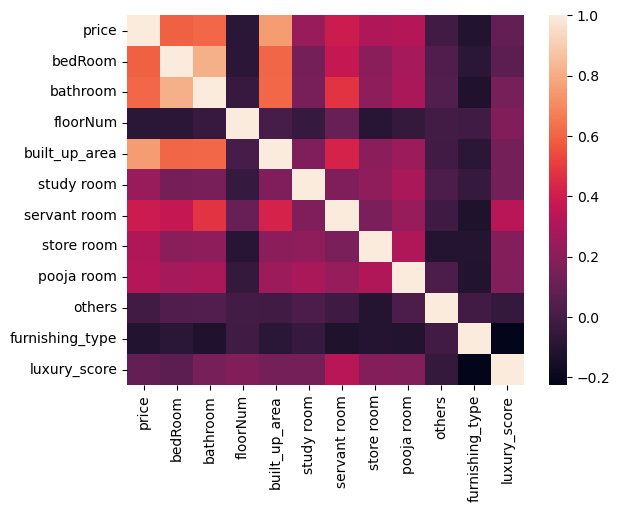

In [8]:
#plotting heatmap to know the linear dependence
sns.heatmap(train_df.corr())

* the price column strongly correlated with built_up_area, bathroom, bedRoom features.
* feature selection conducted on below columns.
* numerical -> luxury_score, others, floorNum.
* categorical -> property_type, sector, agePossession.

## luxury_score

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='luxury_score'>

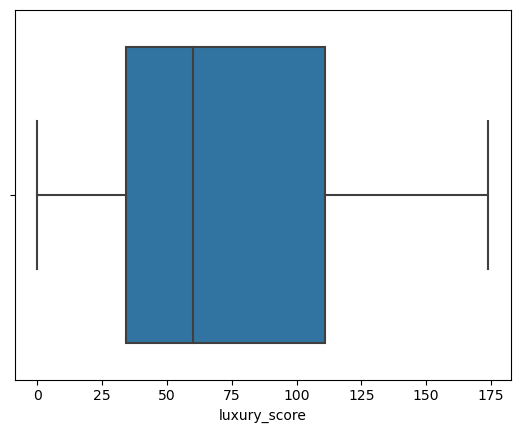

In [9]:
# ploting boxplot to know the distribution 
sns.boxplot(df['luxury_score'])

In [10]:
def categorize_luxury(score):
    if 0 <= score <50:
        return "Low"
    elif 50 <= score <150:
        return "Medium"
    elif 150 <= score <=175:
        return "High"
    else:
        return None # or "Undefined" or any other label for scores outside the defined bins 

In [11]:
#Converting the 'luxury_score' column from numerical to categorical.
train_df['luxury_category']=train_df['luxury_score'].apply(categorize_luxury)

In [12]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,luxury_category
0,flat,sector 22,3.20,3.0,4.0,3+,2.0,New Property,2517.0,0.0,0.0,0.0,0.0,0.0,1.0,42.0,Low
1,flat,sector 107,1.80,3.0,4.0,3+,2.0,Relatively New,1837.0,0.0,1.0,0.0,0.0,0.0,1.0,129.0,Medium
2,flat,sector 2,0.40,1.0,1.0,1,5.0,Moderately Old,450.0,0.0,0.0,0.0,0.0,0.0,0.0,39.0,Low
3,flat,sector 89,1.20,3.0,3.0,3,3.0,New Property,1064.0,0.0,0.0,1.0,1.0,0.0,1.0,131.0,Medium
4,flat,manesar,0.95,3.0,4.0,3,6.0,Moderately Old,2232.0,0.0,1.0,0.0,0.0,0.0,1.0,81.0,Medium


## floorNum

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='floorNum'>

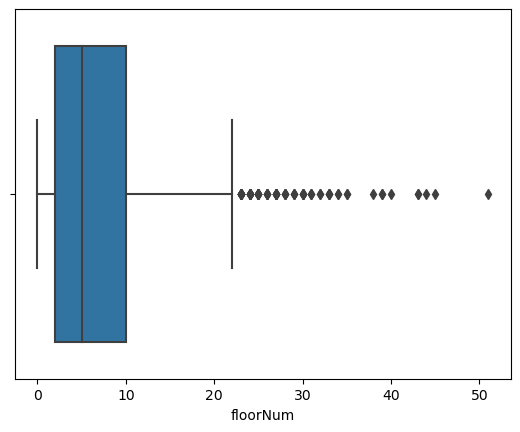

In [13]:
# ploting boxplot to know the distribution 
sns.boxplot(df['floorNum'])

In [14]:
def categorize_floor(floor):
    if 0<= floor <= 2:
        return "Low Floor"
    elif 3 <= floor <=10:
        return "Mid Floor"
    elif 11 <= floor <= 51:
        return "High Floor"
    else:
        return None # or "Undefined" or any other label for floors outside the defined bins

In [15]:
#Converting the 'floorNum' column from numerical to categorical.
train_df['floor_category']=train_df['floorNum'].apply(categorize_floor)

In [16]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,luxury_category,floor_category
0,flat,sector 22,3.20,3.0,4.0,3+,2.0,New Property,2517.0,0.0,0.0,0.0,0.0,0.0,1.0,42.0,Low,Low Floor
1,flat,sector 107,1.80,3.0,4.0,3+,2.0,Relatively New,1837.0,0.0,1.0,0.0,0.0,0.0,1.0,129.0,Medium,Low Floor
2,flat,sector 2,0.40,1.0,1.0,1,5.0,Moderately Old,450.0,0.0,0.0,0.0,0.0,0.0,0.0,39.0,Low,Mid Floor
3,flat,sector 89,1.20,3.0,3.0,3,3.0,New Property,1064.0,0.0,0.0,1.0,1.0,0.0,1.0,131.0,Medium,Mid Floor
4,flat,manesar,0.95,3.0,4.0,3,6.0,Moderately Old,2232.0,0.0,1.0,0.0,0.0,0.0,1.0,81.0,Medium,Mid Floor


In [17]:
# droping floorNum, luxury_score columns.
train_df.drop(columns=['floorNum',"luxury_score"], inplace=True)

In [18]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,flat,sector 22,3.20,3.0,4.0,3+,New Property,2517.0,0.0,0.0,0.0,0.0,0.0,1.0,Low,Low Floor
1,flat,sector 107,1.80,3.0,4.0,3+,Relatively New,1837.0,0.0,1.0,0.0,0.0,0.0,1.0,Medium,Low Floor
2,flat,sector 2,0.40,1.0,1.0,1,Moderately Old,450.0,0.0,0.0,0.0,0.0,0.0,0.0,Low,Mid Floor
3,flat,sector 89,1.20,3.0,3.0,3,New Property,1064.0,0.0,0.0,1.0,1.0,0.0,1.0,Medium,Mid Floor
4,flat,manesar,0.95,3.0,4.0,3,Moderately Old,2232.0,0.0,1.0,0.0,0.0,0.0,1.0,Medium,Mid Floor


In [19]:
#encoding all categorical columns 
from sklearn.preprocessing import OrdinalEncoder

#Create a copy of the original data for label encoding
data_label_encoded=train_df.copy()

categorical_cols= train_df.select_dtypes(include=['object']).columns

#Apply label encoding to categorical columns
for col in categorical_cols:
    oe=OrdinalEncoder()
    data_label_encoded[col]=oe.fit_transform(data_label_encoded[[col]])
    print(oe.categories_)
    

[array(['flat', 'house'], dtype=object)]
[array(['dwarka expressway', 'gwal pahari', 'manesar', 'mehrauli   road',
       'new', 'new sector 2', 'sector 1', 'sector 102', 'sector 103',
       'sector 104', 'sector 105', 'sector 106', 'sector 107',
       'sector 108', 'sector 109', 'sector 10a', 'sector 11',
       'sector 110', 'sector 111', 'sector 112', 'sector 113',
       'sector 12', 'sector 13', 'sector 14', 'sector 15', 'sector 17',
       'sector 17a', 'sector 17b', 'sector 2', 'sector 21', 'sector 22',
       'sector 23', 'sector 24', 'sector 25', 'sector 26', 'sector 27',
       'sector 28', 'sector 3', 'sector 3 phase 2',
       'sector 3 phase 3 extension', 'sector 30', 'sector 31',
       'sector 33', 'sector 36', 'sector 36a', 'sector 37', 'sector 37c',
       'sector 37d', 'sector 38', 'sector 39', 'sector 4', 'sector 40',
       'sector 41', 'sector 43', 'sector 45', 'sector 46', 'sector 47',
       'sector 48', 'sector 49', 'sector 5', 'sector 50', 'sector 51',
      

In [20]:
#splitting the dataset into training and testing sets
X_label = data_label_encoded.drop('price', axis=1)
y_label = data_label_encoded['price']

In [21]:
X_label

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,0.0,30.0,3.0,4.0,4.0,1.0,2517.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
1,0.0,12.0,3.0,4.0,4.0,3.0,1837.0,0.0,1.0,0.0,0.0,0.0,1.0,2.0,1.0
2,0.0,28.0,1.0,1.0,1.0,0.0,450.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0
3,0.0,104.0,3.0,3.0,3.0,1.0,1064.0,0.0,0.0,1.0,1.0,0.0,1.0,2.0,2.0
4,0.0,2.0,3.0,4.0,3.0,0.0,2232.0,0.0,1.0,0.0,0.0,0.0,1.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3549,0.0,100.0,2.0,2.0,3.0,3.0,1660.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3550,0.0,99.0,2.0,2.0,2.0,3.0,1018.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0
3551,1.0,58.0,2.0,6.0,3.0,0.0,1467.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,2.0
3552,1.0,34.0,4.0,4.0,3.0,2.0,1350.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0


In [22]:
y_label

0        3.20
1        1.80
2        0.40
3        1.20
4        0.95
        ...  
3549     1.17
3550     0.49
3551     3.75
3552     4.00
3553    11.58
Name: price, Length: 3554, dtype: float64

## Technique 1 - Correlation Analysis

<AxesSubplot:>

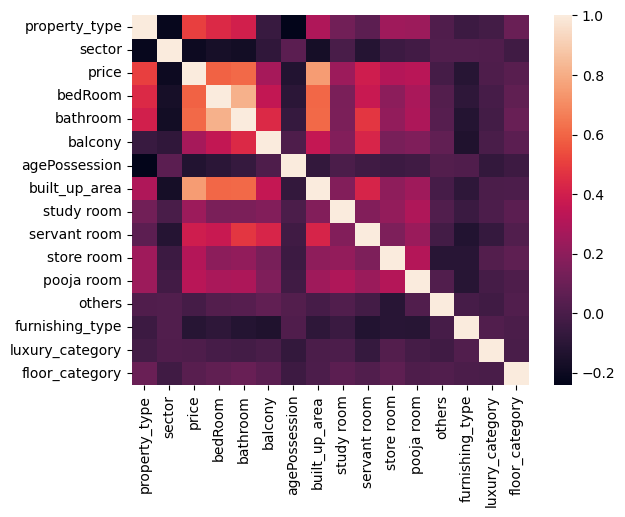

In [23]:
sns.heatmap(data_label_encoded.corr())

In [31]:
fi_df1=data_label_encoded.corr()['price'].iloc[1:].to_frame().reset_index().rename(columns={'index':'feature','price':'corr_coeff'})

In [33]:
fi_df1

,feature,corr_coeff
0,sector,-0.199475
1,price,1.000000
2,bedRoom,0.592220
3,bathroom,0.612052
4,balcony,0.269754
5,agePossession,-0.129255
6,built_up_area,0.751273
7,study room,0.241196
8,servant room,0.392038
9,store room,0.309063


## Technique 2 - Random Forest Feature Importance

In [34]:
from sklearn.ensemble import RandomForestRegressor

#Train a Random Forest regressor on label encoded data
rf_label=RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_label, y_label)

#Extract feature importance scores for label encoded data
fi_df2=pd.DataFrame({
    
    'feature':X_label.columns,
    'rf_importance':rf_label.feature_importances_
}).sort_values(by='rf_importance', ascending=False)

fi_df2

,feature,rf_importance
6,built_up_area,0.651429
1,sector,0.102779
0,property_type,0.098595
2,bedRoom,0.027391
3,bathroom,0.024768
8,servant room,0.018442
5,agePossession,0.013958
4,balcony,0.011833
12,furnishing_type,0.009525
9,store room,0.009157


## Technique 3 - Gradient Boosting Feature importances

In [35]:
from sklearn.ensemble import GradientBoostingRegressor

#Train a Gradient Boosting Regressor on label encoded data 
gb_label=GradientBoostingRegressor()
gb_label.fit(X_label, y_label)

#Extract features importance scores for label encoded data
fi_df3=pd.DataFrame({
    'feature':X_label.columns,
    'gb_importance':gb_label.feature_importances_
}).sort_values(by='gb_importance', ascending=False)
fi_df3

,feature,gb_importance
6,built_up_area,0.675849
1,sector,0.106383
0,property_type,0.096945
2,bedRoom,0.037398
3,bathroom,0.035577
8,servant room,0.026997
9,store room,0.008659
5,agePossession,0.004600
7,study room,0.002614
12,furnishing_type,0.002129


In [36]:
# merging all above 3 technicques 
final_fi_df = fi_df1.merge(fi_df2,on='feature').merge(fi_df3,on='feature').set_index('feature')

In [38]:
final_fi_df

,corr_coeff,rf_importance,gb_importance
feature,,,
sector,-0.199475,0.102779,0.106383
bedRoom,0.592220,0.027391,0.037398
bathroom,0.612052,0.024768,0.035577
balcony,0.269754,0.011833,0.001439
agePossession,-0.129255,0.013958,0.004600
built_up_area,0.751273,0.651429,0.675849
study room,0.241196,0.008581,0.002614
servant room,0.392038,0.018442,0.026997
store room,0.309063,0.009157,0.008659


In [39]:
# normalize the score
final_fi_df=final_fi_df.divide(final_fi_df.sum(axis=0),axis=1)

In [40]:
final_fi_df[['rf_importance','gb_importance']].mean(axis=1).sort_values(ascending=False)

feature
built_up_area      0.735542
sector             0.115912
bedRoom            0.035900
bathroom           0.033436
servant room       0.025177
agePossession      0.010289
store room         0.009873
balcony            0.007360
furnishing_type    0.006462
study room         0.006207
luxury_category    0.004259
pooja room         0.003943
floor_category     0.003662
others             0.001976
dtype: float64

In [41]:
# to drop pooja room, study room, others 
X_label

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,0.0,30.0,3.0,4.0,4.0,1.0,2517.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
1,0.0,12.0,3.0,4.0,4.0,3.0,1837.0,0.0,1.0,0.0,0.0,0.0,1.0,2.0,1.0
2,0.0,28.0,1.0,1.0,1.0,0.0,450.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0
3,0.0,104.0,3.0,3.0,3.0,1.0,1064.0,0.0,0.0,1.0,1.0,0.0,1.0,2.0,2.0
4,0.0,2.0,3.0,4.0,3.0,0.0,2232.0,0.0,1.0,0.0,0.0,0.0,1.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3549,0.0,100.0,2.0,2.0,3.0,3.0,1660.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3550,0.0,99.0,2.0,2.0,2.0,3.0,1018.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0
3551,1.0,58.0,2.0,6.0,3.0,0.0,1467.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,2.0
3552,1.0,34.0,4.0,4.0,3.0,2.0,1350.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0


In [42]:
#with all the cols 
from sklearn.model_selection import cross_val_score
rf=RandomForestRegressor(n_estimators=100, random_state=42)
scores=cross_val_score(rf, X_label, y_label, cv=5, scoring='r2')

In [43]:
scores.mean()

0.8095521395721426

In [45]:
# droping columns'pooja room', 'study room', 'others'.
rf = RandomForestRegressor(n_estimators=100, random_state=42)

scores = cross_val_score(rf, X_label.drop(columns=['pooja room', 'study room', 'others']), y_label, cv=5, scoring='r2')

In [46]:
scores.mean()

0.8100224668443856

In [47]:
export_df = X_label.drop(columns=['pooja room', 'study room', 'others'])
export_df['price'] = y_label

In [48]:
export_df.to_csv('gurgaon_properties_post_feature_selection.csv', index=False)

In [49]:
export_df

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,servant room,store room,furnishing_type,luxury_category,floor_category,price
0,0.0,30.0,3.0,4.0,4.0,1.0,2517.0,0.0,0.0,1.0,1.0,1.0,3.20
1,0.0,12.0,3.0,4.0,4.0,3.0,1837.0,1.0,0.0,1.0,2.0,1.0,1.80
2,0.0,28.0,1.0,1.0,1.0,0.0,450.0,0.0,0.0,0.0,1.0,2.0,0.40
3,0.0,104.0,3.0,3.0,3.0,1.0,1064.0,0.0,1.0,1.0,2.0,2.0,1.20
4,0.0,2.0,3.0,4.0,3.0,0.0,2232.0,1.0,0.0,1.0,2.0,2.0,0.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3549,0.0,100.0,2.0,2.0,3.0,3.0,1660.0,0.0,0.0,1.0,1.0,0.0,1.17
3550,0.0,99.0,2.0,2.0,2.0,3.0,1018.0,0.0,0.0,1.0,2.0,0.0,0.49
3551,1.0,58.0,2.0,6.0,3.0,0.0,1467.0,0.0,0.0,1.0,1.0,2.0,3.75
3552,1.0,34.0,4.0,4.0,3.0,2.0,1350.0,0.0,1.0,1.0,1.0,1.0,4.00
